## 3.1

In [121]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

df = pd.read_csv('data.txt', delim_whitespace=True, header=None)
X, y = df[0], df[1]

In [122]:
splits = 10

X_trains = []
X_vals = []
Y_trains = []
Y_vals = []

for i in range(10):
    X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2, random_state=i)
    X_trains.append(X_train)
    X_vals.append(X_val)
    Y_trains.append(Y_train)
    Y_vals.append(Y_val)

    # print(len(X_train), len(X_val), len(Y_train), len(Y_val))


## 3.2

In [123]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for i in range(splits):
    # Reshape because only single feature
    X_train = X_trains[i].values.reshape(-1, 1)
    X_val = X_vals[i].values.reshape(-1, 1)
    Y_train = Y_trains[i].values.reshape(-1, 1)
    Y_val = Y_vals[i].values.reshape(-1, 1)

    scaler.fit(X_train)
    X_trains[i] = scaler.transform(X_train)
    X_vals[i] = scaler.transform(X_val)

    scaler.fit(Y_train)
    Y_trains[i] = scaler.transform(Y_train)
    Y_vals[i] = scaler.transform(Y_val)

# print(X_trains)

## 3.3

In [124]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = [1, 3, 5, 50]

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    training_errors = []
    validation_errors = []
    for i in range(splits):
        X_train = X_trains[i]
        X_val = X_vals[i]
        Y_train = Y_trains[i]
        Y_val = Y_vals[i]

        train_poly_features = poly.fit_transform(X_train)
        poly_reg = LinearRegression()
        poly_reg.fit(train_poly_features, Y_train)

        print(f'hypothesis_deg={degree} fold={i}:', end=' ')
        print(f'w0={poly_reg.intercept_} weights={poly_reg.coef_}')
    print()

hypothesis_deg=1 fold=0: w0=[-5.84498087e-17] weights=[[0.84701035]]
hypothesis_deg=1 fold=1: w0=[-2.9804424e-17] weights=[[0.85236492]]
hypothesis_deg=1 fold=2: w0=[-1.56495889e-17] weights=[[0.84139486]]
hypothesis_deg=1 fold=3: w0=[2.1051832e-16] weights=[[0.83472184]]
hypothesis_deg=1 fold=4: w0=[-3.60941219e-17] weights=[[0.85085558]]
hypothesis_deg=1 fold=5: w0=[-1.05596766e-16] weights=[[0.84773778]]
hypothesis_deg=1 fold=6: w0=[2.58428392e-17] weights=[[0.85043625]]
hypothesis_deg=1 fold=7: w0=[1.99071887e-17] weights=[[0.83841832]]
hypothesis_deg=1 fold=8: w0=[-5.55111512e-17] weights=[[0.85162214]]
hypothesis_deg=1 fold=9: w0=[6.24500451e-17] weights=[[0.8318558]]

hypothesis_deg=3 fold=0: w0=[-0.45183648] weights=[[0.24640905 0.4301508  0.32588316]]
hypothesis_deg=3 fold=1: w0=[-0.40848812] weights=[[0.16911145 0.3646276  0.3762513 ]]
hypothesis_deg=3 fold=2: w0=[-0.42787861] weights=[[0.24904806 0.43057374 0.33667866]]
hypothesis_deg=3 fold=3: w0=[-0.49498315] weights=[[0.2

## 3.4a

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

training_errors_mean = []
validation_errors_mean = []
training_errors_std = []
validation_errors_std = []

best_model_index = [-1] * len(degrees)
best_predictions = [[] for _ in range(len(degrees))]

for hyp_class, degree in enumerate(degrees):
    min_error = 9999999
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    training_errors = []
    validation_errors = []
    for i in range(splits):
        X_train = X_trains[i]
        X_val = X_vals[i]
        Y_train = Y_trains[i]
        Y_val = Y_vals[i]

        train_poly_features = poly.fit_transform(X_train)
        poly_reg = LinearRegression()
        poly_reg.fit(train_poly_features, Y_train)

        y_train_preds = poly_reg.predict(train_poly_features)
        error = mean_squared_error(Y_train, y_train_preds)
        training_errors.append(error)
        if min_error > error:
            best_model_index[hyp_class] = i
            best_predictions[hyp_class] = y_train_preds

        val_poly_features = poly.transform(X_val)
        y_val_preds = poly_reg.predict(val_poly_features)
        error = mean_squared_error(Y_val, y_val_preds)
        validation_errors.append(error)

    training_errors_mean.append(np.mean(training_errors))
    training_errors_std.append(np.std(training_errors) / (10 ** 0.5))
    validation_errors_mean.append(np.mean(validation_errors))
    validation_errors_std.append(np.std(validation_errors) / (10 ** 0.5))

    print(f'Hypothesis class={hyp_class} degree={degree} training error mean={np.mean(training_errors)} std={np.std(training_errors)}')
    # print(f'Validation error mean={np.mean(validation_errors)} std={np.std(validation_errors)}')
    print()


Hypothesis class=0 degree=1 training error mean=0.28652956639912375 std=0.011998428171877178

Hypothesis class=1 degree=3 training error mean=0.06028226428078004 std=0.0038722935138260357

Hypothesis class=2 degree=5 training error mean=0.05885828680056717 std=0.004058724909364577

Hypothesis class=3 degree=50 training error mean=0.19581915489822702 std=0.18238616743869968



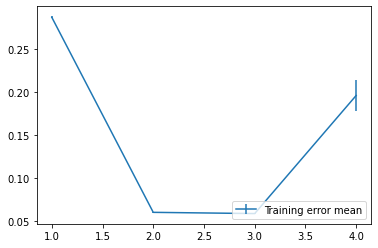

In [126]:
x = [1, 2, 3, 4]
yerr = [std / np.sqrt(10) for std in training_errors_std]

plt.errorbar(x, training_errors_mean, yerr=yerr, label='Training error mean')
# plt.errorbar(x, training_errors_std, label='Training error std')

plt.legend(loc='lower right')

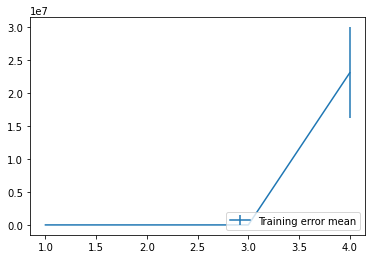

In [127]:
yerr = [std / np.sqrt(10) for std in validation_errors_std]

plt.errorbar(x, validation_errors_mean, yerr=yerr, label='Training error mean')
# plt.errorbar(x, validation_errors_std, label='Validation error std')
plt.legend(loc='lower right')

## 3.4b

In [128]:
for i, degree in enumerate(degrees):
    print(f'Hypothesis class={i} degree={degrees[i]} fold_index={best_model_index[i]}')

def scatter_plot(index):
    x = X_trains[best_model_index[index]]
    y = Y_trains[best_model_index[index]]
    y_pred = best_predictions[index]
    plt.scatter(x, y, label='Actual')
    plt.scatter(x, y_pred, label='Predicted')
    plt.legend()

Hypothesis class=0 degree=1 fold_index=9
Hypothesis class=1 degree=3 fold_index=9
Hypothesis class=2 degree=5 fold_index=9
Hypothesis class=3 degree=50 fold_index=9


### Hypothesis class (a)

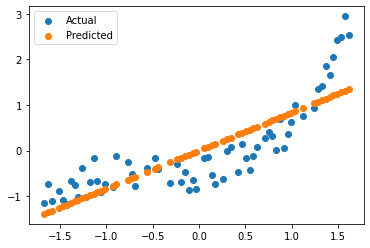

In [129]:
scatter_plot(0)

### Hypothesis class (b)

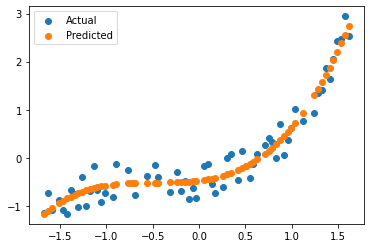

In [130]:
scatter_plot(1)

### Hypothesis class (c)

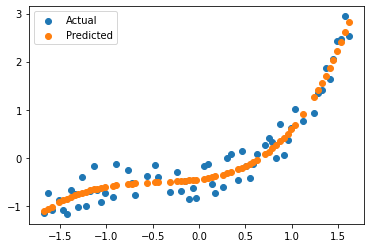

In [131]:
scatter_plot(2)

### Hypothesis class (d)

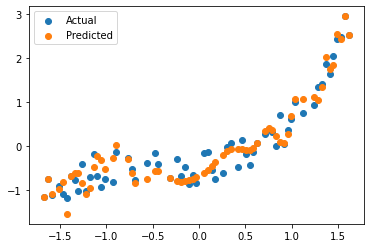

In [132]:
scatter_plot(3)

## 3.5

* I would choose hypothesis class (b) because it generalizes well on the data.
* We cannot choose class (a) since it underfits the data and nor can we choose class (d)
since it is overfitting.
* Both class (b) and (c) have low training and validation error but we choose (b) since it
is a simpler model, so it is likely to perform better on unseen data.